# Transformer Implementation 
## Attention is All You Need
### The Annotated Transformer
References
- Harvard NLP 'The Annotated Transformer': http://nlp.seas.harvard.edu/2018/04/03/attention.html 
- post: https://cpm0722.github.io/pytorch-implementation/transformer 
- post: https://paul-hyun.github.io/transformer-01/ 

# 0.Prelims

In [3]:
pip install Ipythondd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: C:\Users\user\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
import pandas as pd 
import numpy as np 
import math, copy, time  
import matplotlib.pyplot as plt 
import seaborn 
seaborn.set_context(context='talk')
%matplotlib inline 

import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from torch.autograd import Variable 

from IPython.display import Image
from PIL import Image

# 1.Transformer Architecture

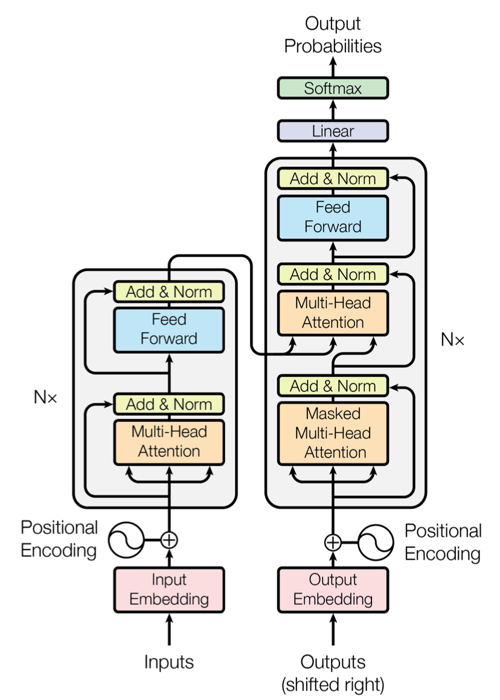

In [16]:
# overall architecture for Transformer's Encoder & Decoder: satacked self-attention & point-wise fully connected layers 
Image.open("C:\\Users\\user\\OneDrive\\사진\\transformer_structure_in_paper.png").resize((500,700))


In [3]:
# Trnasformer Model 
class Transformer(nn.Module): 
    def __init__(self, encoder, decoder):
        super(Transformer, self).__init__()
        self.encoder = encoder 
        self.decoder = decoder 
        
    def encode(self, x):
        out = self.encoder(x)
        return out 
    
    def decode(self ,z, c): 
        out = self.decode(z, c)
        return out 
    
    def forward(self, x, z): 
        c = self.encode(x)
        y = self.decode(z, c)
        
        return y 



In [4]:
# Encoder 
class Encoder(nn.Module):
    def __init__(self, encoder_block, n_layer):  # n_layer: number of Encoder blocks 
        super(Encoder, self).__init__()
        self.layers = []
        for i in range(n_layer):
            self.layers.append(copy.deepcopy(encoder_block))
    
    def forward(self, x):
        out = x 
        for layer in self.layers: 
            out = layer(out)
        return out 


In [5]:
# Encoder Block 
class EncoderBlock(nn.Module):
    
    def __init__(self, self_attention, position_ff):
        super(EncoderBlock, self).__init__()
        self.self_attention = self_attention 
        self.position_ff = position_ff 
 
    def forward(self, x): 
        out = x 
        out = self.self_attention(out)
        out = self.position_ff(out)
        return out 
